In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Data.csv")
fund = pd.read_csv("NCAP_Funding.csv")
s_data = pd.read_csv("State_data.csv")

In [ ]:
import pandas as pd
data=pd.read_csv("C:\\Users\\busab\\Downloads\\Data (2).csv")
df=pd.DataFrame(data)
df

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [ ]:
#-----------------1---------------Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?
data1=df.groupby("state")["PM2.5"].mean().reset_index()
data1.columns=['State','Mean']
print(data1["Mean"].max())

104.1009176780069


In [ ]:
#---------------2-----------------Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
data6=df[df["Timestamp"].dt.year==2023]
data7=data6[data6["PM2.5"]>300]
data8=data7.groupby("state")["Timestamp"].count().reset_index()
data8.columns=["State","count"]
print(data8[data8["count"]==data8["count"].max()])

   State  count
3  Delhi    470


In [ ]:
#----------------3--------------------Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)
data2=df[df["Timestamp"].dt.year==2023]
data3=data2.groupby("state")["PM2.5"].std().reset_index()
data3.columns=["State","std"]
print(data3[data3["std"]==data3["std"].max()])

   State        std
6  Delhi  82.797106


In [ ]:
#---------------4--------------Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?
data4=df[(df["Timestamp"].dt.year==2020) | (df["Timestamp"].dt.year==2021)]
data5=data4.groupby("state")["PM2.5"].mean().reset_index()
data5.columns=["index","mean"]
print(data5[data5["mean"]==data5["mean"].min()])

      index      mean
18  Mizoram  14.32335


In [ ]:
#Temporal Aggregation

In [ ]:
#-----------1----------Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.
data9=df[df["Timestamp"].dt.year==2023]
data10=data9[data9["Timestamp"].dt.month==8]
data11=data10.groupby("state")["PM2.5"].std().reset_index()
data11.columns=["Index","std"]
print(data11[data11["std"]==data11["std"].max()])

        Index        std
11  Jharkhand  89.448833


In [ ]:
#-----------2-----------For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
#[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?
data12=df[df["Timestamp"].dt.year==2023]
data13=data12[data12["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
winter=data13[(data13["Timestamp"].dt.month==12)|(data13["Timestamp"].dt.month==1)|(data13["Timestamp"].dt.month==2)]
summer=data13[(data13["Timestamp"].dt.month==3)|(data13["Timestamp"].dt.month==4)|(data13["Timestamp"].dt.month==5)]
monsoon=data13[(data13["Timestamp"].dt.month==6)|(data13["Timestamp"].dt.month==7)|(data13["Timestamp"].dt.month==8)]
sum_2=summer["PM2.5"].mean()
win_2=winter["PM2.5"].mean()
mon_2=monsoon["PM2.5"].mean()
if sum_2>=win_2:
    if mon_2>sum_2:
            print("Highest polluted season is monsoon")
    else:
        if sum_2==win_2:
            print("Highest polluted season is summer and winter")
        else:
            print("Highest polluted season is summer")
else:
    if win_2>mon_2:
        print("Highest polluted season is winter")
    elif win_2==mon_2:
        print("Highest polluted season is winter and  monsoon")
    else:
        print("Highest polluted season is monsoon")
if sum_2==mon_2 and sum_2==win_2:
    print("Highest polluted seasons are summer,winter and monsoon")
# may be due to condesnsation process or fog formation size of pollutant particles gets increased due to covering of water vapour present in air

Highest polluted season is winter


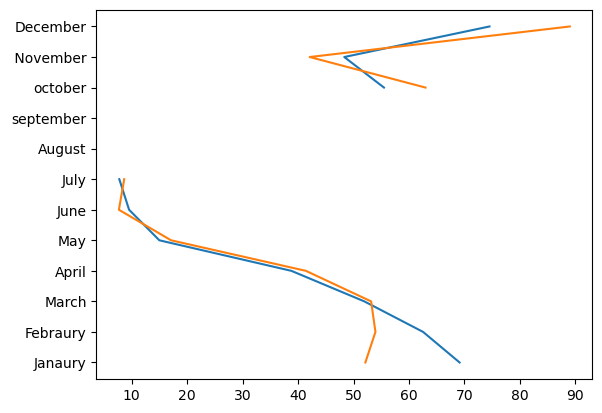

In [ ]:
#----------3-----Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
import matplotlib.pyplot as plt
data14=df[df["Timestamp"].dt.year==2021]
data14=data14[data14["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
data_weekend=data14[(data14["Timestamp"].dt.day_name()=="Sunday")|(data14["Timestamp"].dt.day_name()=="Saturday")]
data_working=data14[(data14["Timestamp"].dt.day_name()=="Monday")|(data14["Timestamp"].dt.day_name()=="Tuesday")|(data14["Timestamp"].dt.day_name()=="Wednesday")|(data14["Timestamp"].dt.day_name()=="Thursday")|(data14["Timestamp"].dt.day_name()=="Friday")]
week_PM=data_weekend["PM2.5"].mean()
work_PM=data_working["PM2.5"].mean()
month=[1,2,3,4,5,6,7,8,9,10,11,12]
x_1=data_working.groupby(data_working["Timestamp"].dt.month)["PM2.5"].mean().reset_index()
x_1.columns=["index","mon"]
x1=[i for i in x_1["mon"]]
x_2=data_weekend.groupby(data_weekend["Timestamp"].dt.month)["PM2.5"].mean().reset_index()
x_2.columns=["index","mon"]
x2=[i for i in x_2["mon"]]
y=["Janaury","Febraury","March","April","May","June","July","August","september","october"," November","December"]
plt.plot(x1,y)
plt.plot(x2,y)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sta

In [ ]:
df1=pd.read_csv("Data.csv")
df1

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [ ]:
df2=pd.read_csv("NCAP_Funding.csv")
df2

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [ ]:
df3=pd.read_csv("State_data.csv")
df3

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


Spatio-temporal aggregation [3 marks]
1.	For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?
2.	Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?
3.	Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [ ]:
df=df1.copy()
df["Timestamp"]=pd.to_datetime(df["Timestamp"], errors="coerce")
df=df[df["Timestamp"].dt.year==2022]
df11=df[df["Timestamp"].dt.month.isin([6,7,8,9])]
df22=df[df["Timestamp"].dt.month.isin([3,4,5])]
df11avg=df11.groupby("state")["PM2.5"].mean()
df11avgsum=df11.groupby("state")["PM2.5"].mean()
df22avg=df22.groupby("state")["PM2.5"].mean()
print(np.abs((df11avg-df22avg)/df11avg).idxmax())
np.abs((df11avg-df22avg)/df11avg)

Assam


state
Andhra Pradesh       0.556587
Arunachal Pradesh    1.131156
Assam                1.575754
Bihar                1.127661
Chandigarh           0.822298
Chhattisgarh         0.123284
Delhi                1.236815
Gujarat              0.816126
Haryana              0.949496
Himachal Pradesh     0.588992
Jammu and Kashmir    0.000031
Jharkhand                 NaN
Karnataka            1.020143
Kerala               0.173165
Madhya Pradesh       1.285798
Maharashtra          1.114463
Manipur              0.939545
Meghalaya            0.943509
Mizoram              1.440663
Nagaland             1.285705
Odisha               0.071961
Puducherry           0.292387
Punjab               0.588140
Rajasthan            0.872470
Sikkim               1.074916
Tamil Nadu           0.219322
Telangana            1.006435
Tripura              1.307217
Uttar Pradesh        1.126716
Uttarakhand          0.998589
West Bengal          1.150389
Name: PM2.5, dtype: float64

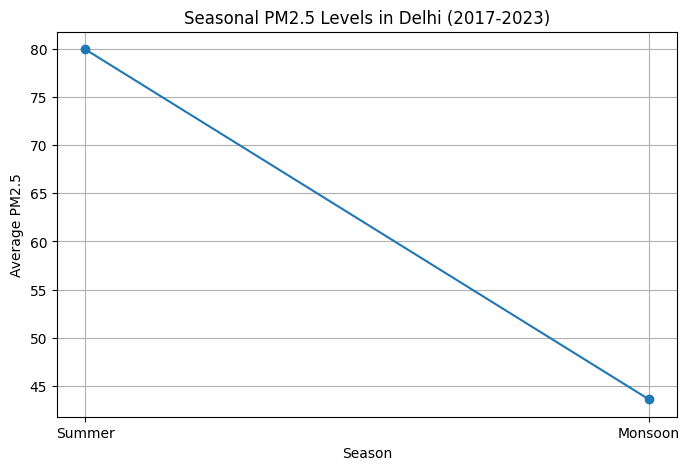

season
Winter                NaN
Summer          79.937123
Monsoon         43.638206
Post-Monsoon          NaN
Name: PM2.5, dtype: float64


In [ ]:
df=df1.copy()
df["Timestamp"]=pd.to_datetime(df["Timestamp"], errors="coerce")
df=df[df["Timestamp"].dt.year.between(2017,2023)]
def fun(month):
  if month in [1,2,12]:
    return "winter"
  elif month in [3, 4, 5]:
        return "Summer"
  elif month in [6, 7, 8, 9]:
        return "Monsoon"
df["season"]=df["Timestamp"].dt.month.apply(fun)
dfdelhi=df[df["state"]=="Delhi"]
avg=dfdelhi.groupby("season")["PM2.5"].mean()
season_order = ["Winter", "Summer", "Monsoon", "Post-Monsoon"]
avg = avg.reindex(season_order)
plt.figure(figsize=(8, 5))
plt.plot(avg.index, avg, marker="o", linestyle="-", color="C0")
plt.xlabel("Season")
plt.ylabel("Average PM2.5")
plt.title("Seasonal PM2.5 Levels in Delhi (2017-2023)")
plt.grid(True)
plt.show()
print(avg)

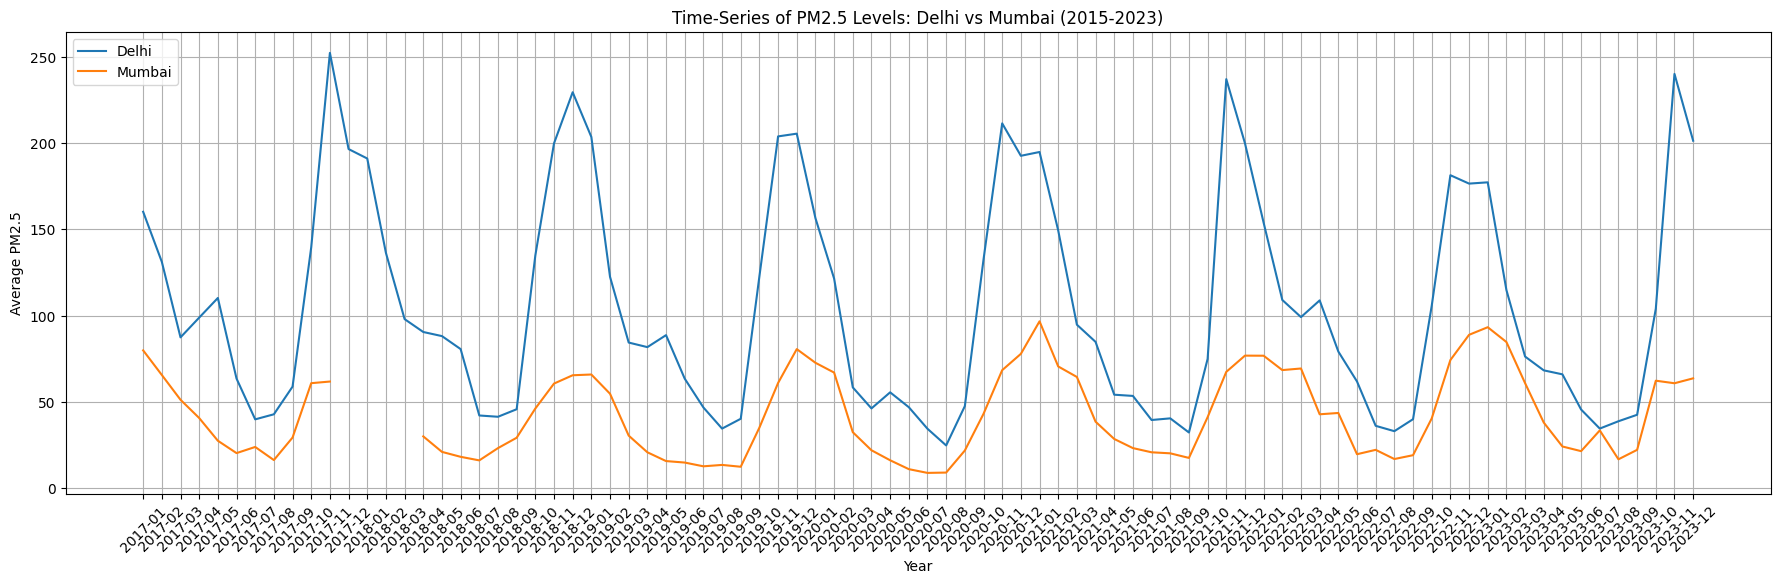

Fluctuation (Standard Deviation) of PM2.5 levels:
Delhi: 62.98
Mumbai: 24.53
Delhi had more fluctuations in PM2.5 levels.


In [ ]:
df = df1.copy()
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df = df[df["Timestamp"].dt.year.between(2015, 2023)]
df_cities = df[df["city"].isin(["Delhi", "Mumbai"])].copy()
# df_cities.loc[df_cities ["city"] == "Mumbai", "PM2.5"] = df_cities.loc[df_cities["city"] == "Mumbai", "PM2.5"].fillna(df_cities.loc[df_cities ["city"] == "Mumbai", "PM2.5"].median())

# Group by month to smooth out daily variations
df_cities["Year-Month"] = df_cities["Timestamp"].dt.to_period("M")

# Calculate monthly PM2.5 averages
df_avg = df_cities.groupby(["Year-Month", "city"])["PM2.5"].mean().unstack()
plt.figure(figsize=(22, 6))
plt.plot(df_avg.index.astype(str), df_avg["Delhi"],label="Delhi")
plt.plot(df_avg.index.astype(str), df_avg["Mumbai"],label="Mumbai")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Time-Series of PM2.5 Levels: Delhi vs Mumbai (2015-2023)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

    # Calculate Fluctuation (Standard Deviation)
delhi_std = df_avg["Delhi"].std()
mumbai_std = df_avg["Mumbai"].std()
print(f"Fluctuation (Standard Deviation) of PM2.5 levels:")
print(f"Delhi: {delhi_std:.2f}")
print(f"Mumbai: {mumbai_std:.2f}")
if delhi_std > mumbai_std:
        print("Delhi had more fluctuations in PM2.5 levels.")
else:
        print("Mumbai had more fluctuations in PM2.5 levels.")

Population-Based [3 Marks]
1.	Which state in India has the highest number of monitoring stations relative to its population?
2.	Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.
3.	Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
a.	X-axis: Population density (people per square kilometer).
b.	Y-axis: Average PM2.5 concentration.
c.	Use a scatter plot to show the relationship, where each point represents a state.

In [ ]:
df11= df1.copy()
df33= df3.copy()
df33= df33.rename(columns={"State": "state"})

# Merging state and station data on 'state'
df_merged = df33.merge(df11, on="state", how="inner")

# Group by state and calculate total stations and population
stations_count = df_merged.groupby("state")["station"].count()
population = df_merged.groupby("state")["Population"].sum()

# Calculate stations per million people
stations_per_million = (stations_count / population) * 1_000_000

# Find the state with the highest stations per million
max_state = stations_per_million.idxmax()
max_value = stations_per_million.max()

print(f"The state with the highest number of monitoring stations relative to its population is {max_state} with {max_value:.2f} stations per million people.")


The state with the highest number of monitoring stations relative to its population is Sikkim with 1.64 stations per million people.


In [ ]:
df11=df1.copy()
df33=df3.copy()
df11["Timestamp"]=pd.to_datetime(df11["Timestamp"], errors="coerce")
df33.rename(columns={"State":"state"},inplace=True)
df11=df11.query('Timestamp.dt.year==2023')
grp1=df11.groupby("state")["PM2.5"].sum()
grp1.reset_index()
grp1=grp1.reset_index().merge(df33,on="state", how="inner")
grp1["percap"]=grp1["PM2.5"]/grp1["Population"]
print(grp1.sort_values(by="percap", ascending=False).head(5)["state"].reset_index()["state"].to_numpy())
print(grp1.sort_values(by="percap", ascending=False).head(5)["state"].reset_index()["state"].to_list())

['Delhi' 'Chandigarh' 'Haryana' 'Rajasthan' 'Tripura']
['Delhi', 'Chandigarh', 'Haryana', 'Rajasthan', 'Tripura']


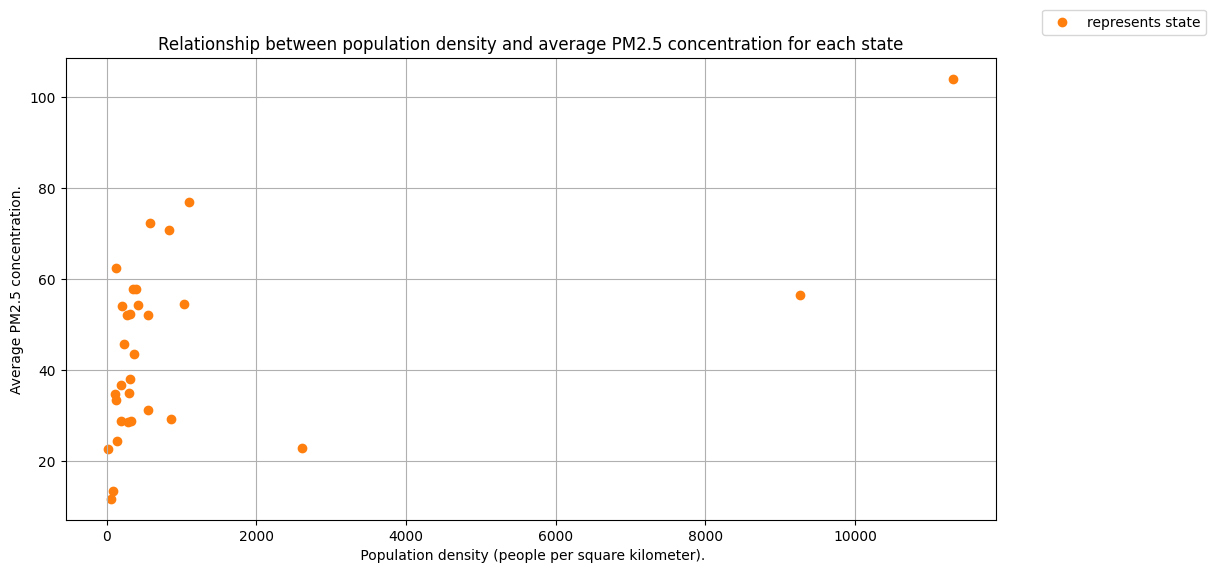

In [ ]:
df11= df1.copy()
df33= df3.copy()
df33= df33.rename(columns={"State": "state"})
df_merged = df33.merge(df11, on="state", how="inner")
grp1=df_merged.groupby("state")["Population"].sum()
grp=df_merged.groupby("state")["Area (km2)"].sum()
grp2=grp1/ grp.replace(0, np.nan)  # Avoid division by zero
grp3=df_merged.groupby("state")["PM2.5"].mean()
plt.figure(figsize=(12,6))
plt.scatter(grp2,grp3,color="C1",label="represents state")
plt.xlabel(" Population density (people per square kilometer).")
plt.ylabel("Average PM2.5 concentration.")
plt.title("Relationship between population density and average PM2.5 concentration for each state")
plt.grid(True)
plt.legend(loc=(1.05,1.05))
plt.show()
  # 1. Most states cluster at low population densities, but there is significant variation in PM2.5 levels.
  # 2. There is a weak positive correlation between population density and PM2.5 concentration.
  # 3. States with high population density tend to have higher pollution, but exceptions exist.
  # 4. Factors like industrialization, vehicular emissions, crop burning, and local environmental policies likely play a significant role.

Area Based [4 Marks]
1.	Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
a.	X-axis: States.
b.	Y-axis: PM2.5 concentration per square kilometer.
c.	Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.
2.	Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.
3.	Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.
4.	Which state has the highest number of monitoring stations per unit area?


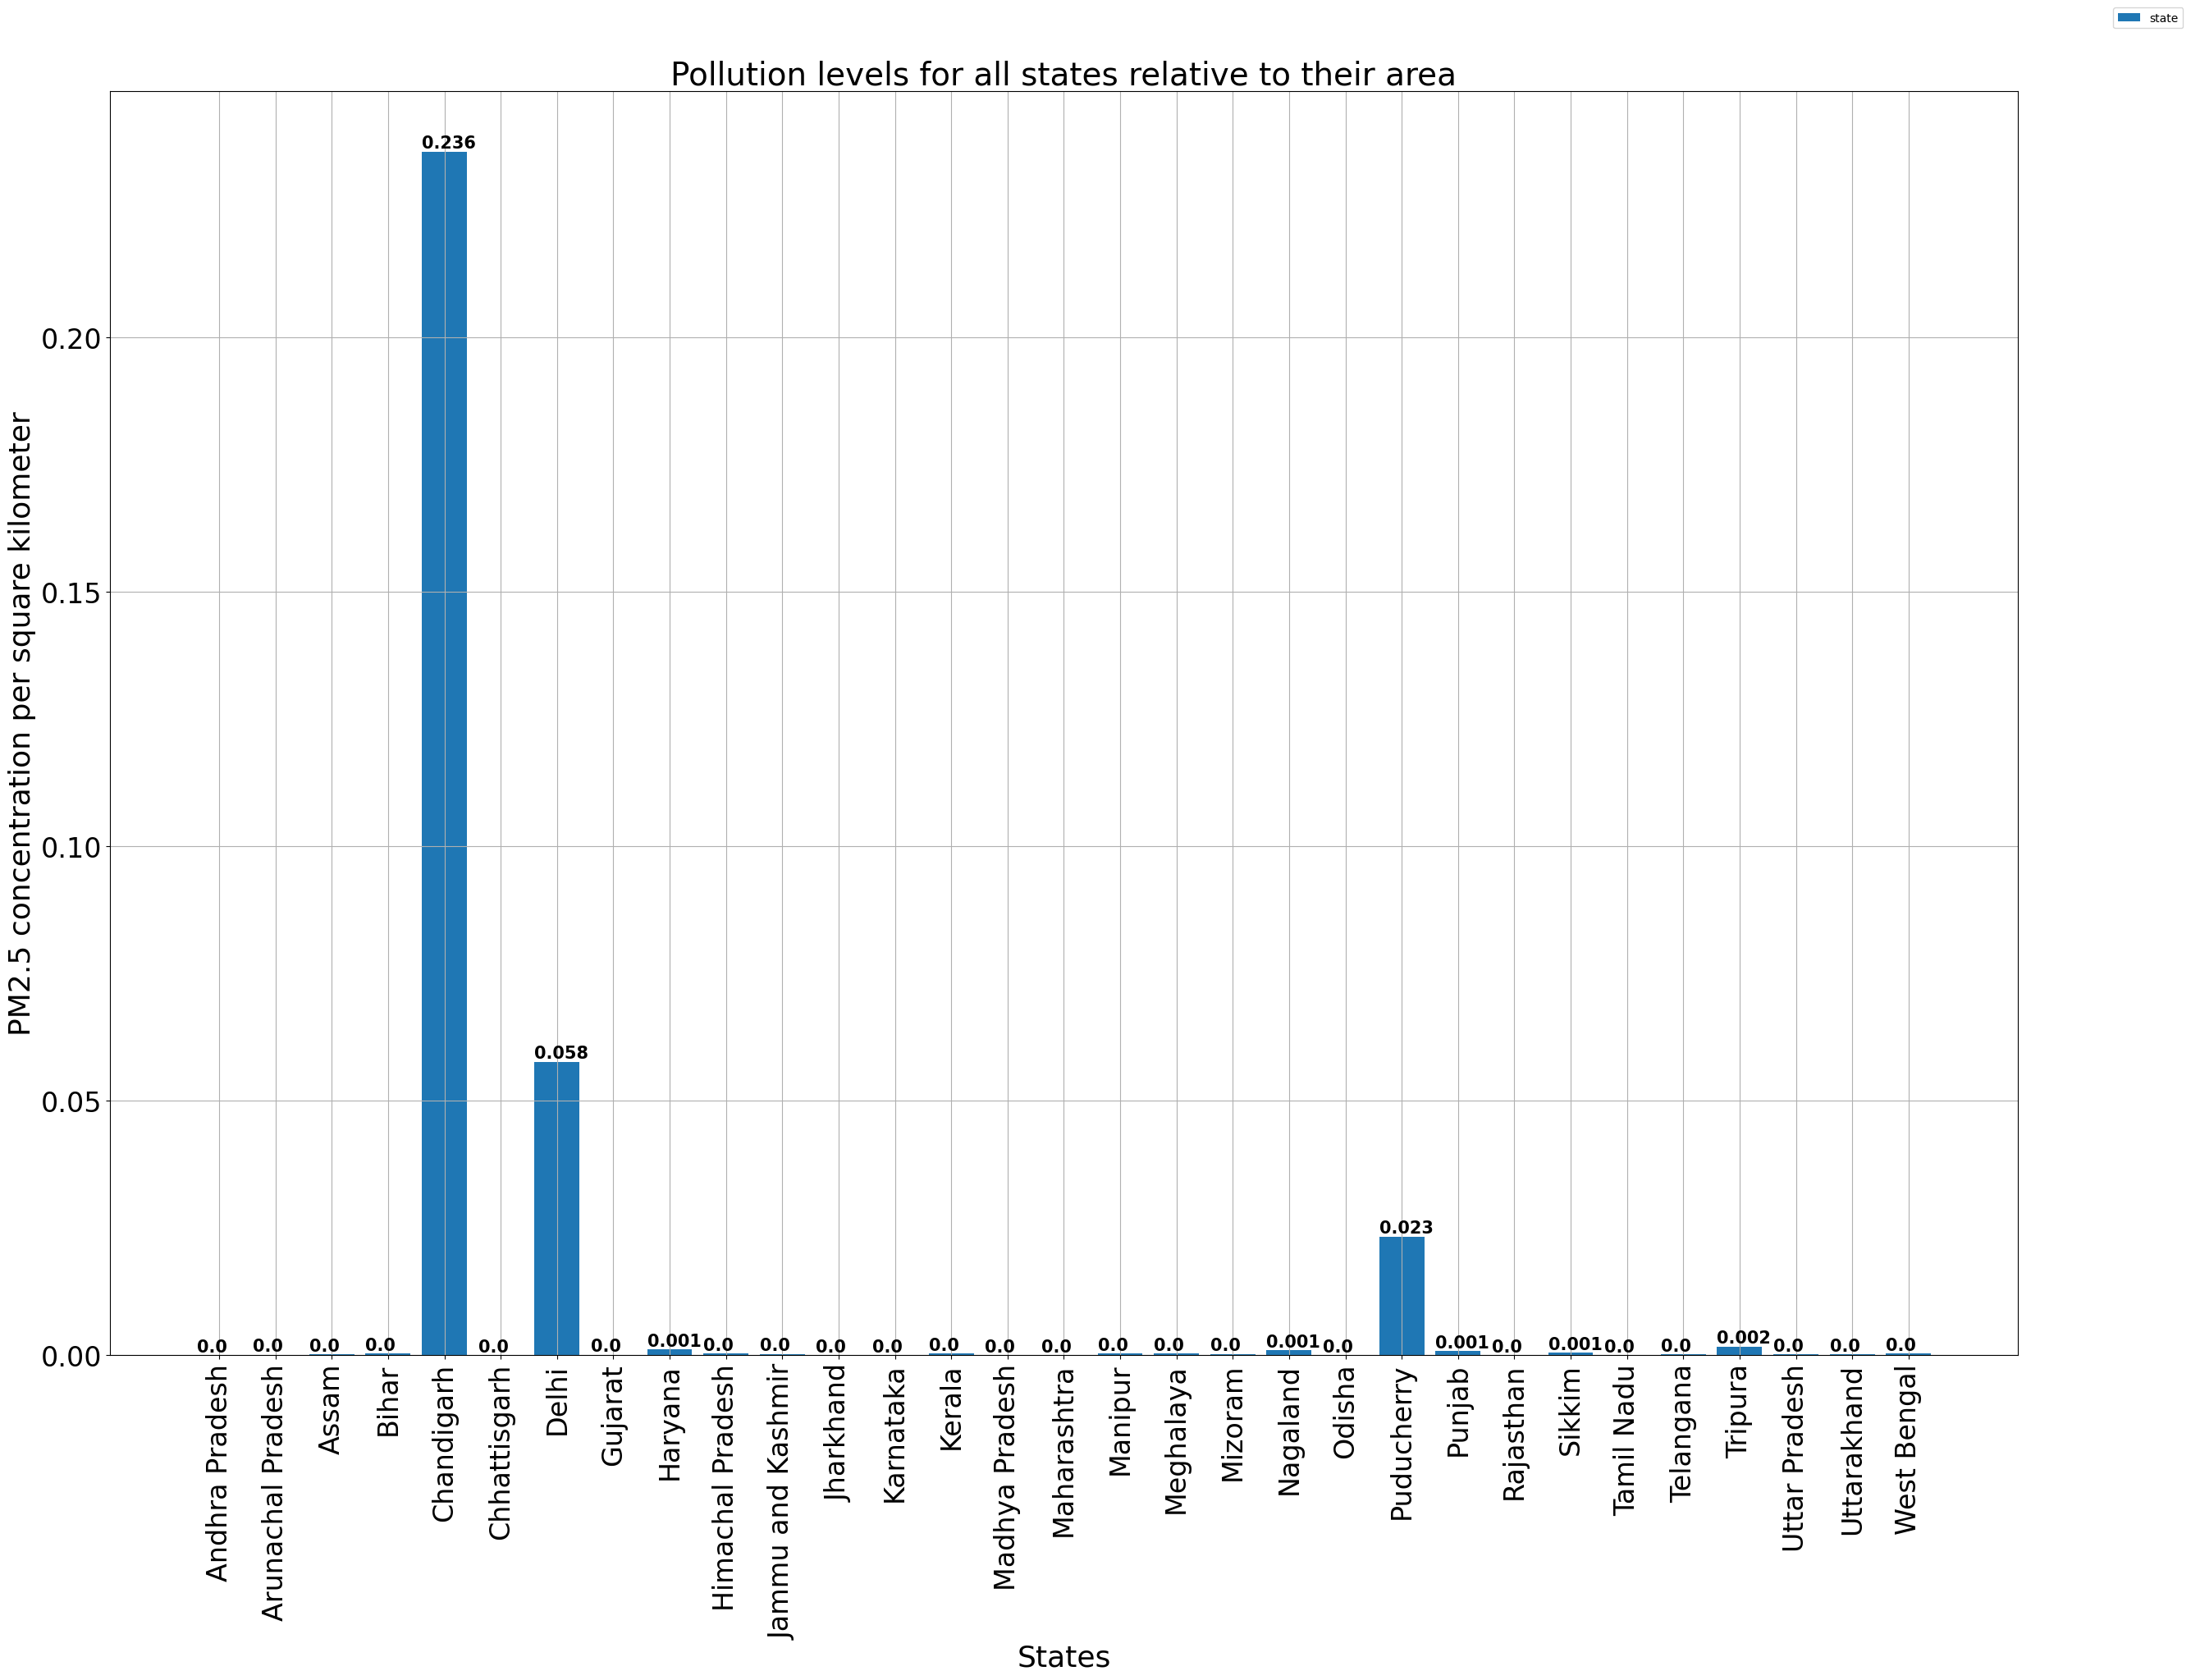

state
Andhra Pradesh         304.200663
Arunachal Pradesh       16.523495
Assam                  397.837477
Bihar                 1105.523953
Chandigarh            9258.333333
Chhattisgarh           188.954953
Delhi                11312.628706
Gujarat                308.328021
Haryana                573.406813
Himachal Pradesh       123.302175
Jammu and Kashmir      290.405814
Jharkhand              413.820739
Karnataka              318.551428
Kerala                 859.585235
Madhya Pradesh         235.608557
Maharashtra            365.192023
Manipur                115.124737
Meghalaya              132.279148
Mizoram                 52.047151
Nagaland               119.337837
Odisha                 269.571818
Puducherry            2605.329854
Punjab                 550.878400
Rajasthan              200.294055
Sikkim                  86.045237
Tamil Nadu             554.729659
Telangana              312.318085
Tripura                350.197026
Uttar Pradesh          829.344622
Uttarakh

In [ ]:
df11=df1.copy()
df33=df3.copy()
df33=df33.rename(columns={"State": "state"})
df=df11.merge(df33, on="state", how="inner")
pop=df.groupby("state")["Population"].sum()
grp1=df.groupby("state")["PM2.5"].sum()
grp2=df.groupby("state")["Area (km2)"].sum()
pop_den=pop/grp2
grp=grp1/grp2
r=grp.reset_index().rename(columns={0:"per"})
plt.figure(figsize=(30,20))
bars=plt.bar(r["state"],r["per"], color="C0",label="state")
plt.xlabel("States",fontsize=26)
plt.ylabel("PM2.5 concentration per square kilometer",fontsize=26)
plt.title("Pollution levels for all states relative to their area",fontsize=28)
plt.grid(True)
for bar in bars:
        yval = bar.get_height()  # Get bar height
        plt.text(bar.get_x(),yval, round(yval,3), va='bottom',fontsize=15,fontweight='bold',color='black')
plt.yticks(fontsize=24)
plt.xticks(rotation=90,fontsize=24)
plt.legend(loc=(1.05,1.05))
plt.show()
pop_den

['Andhra Pradesh']


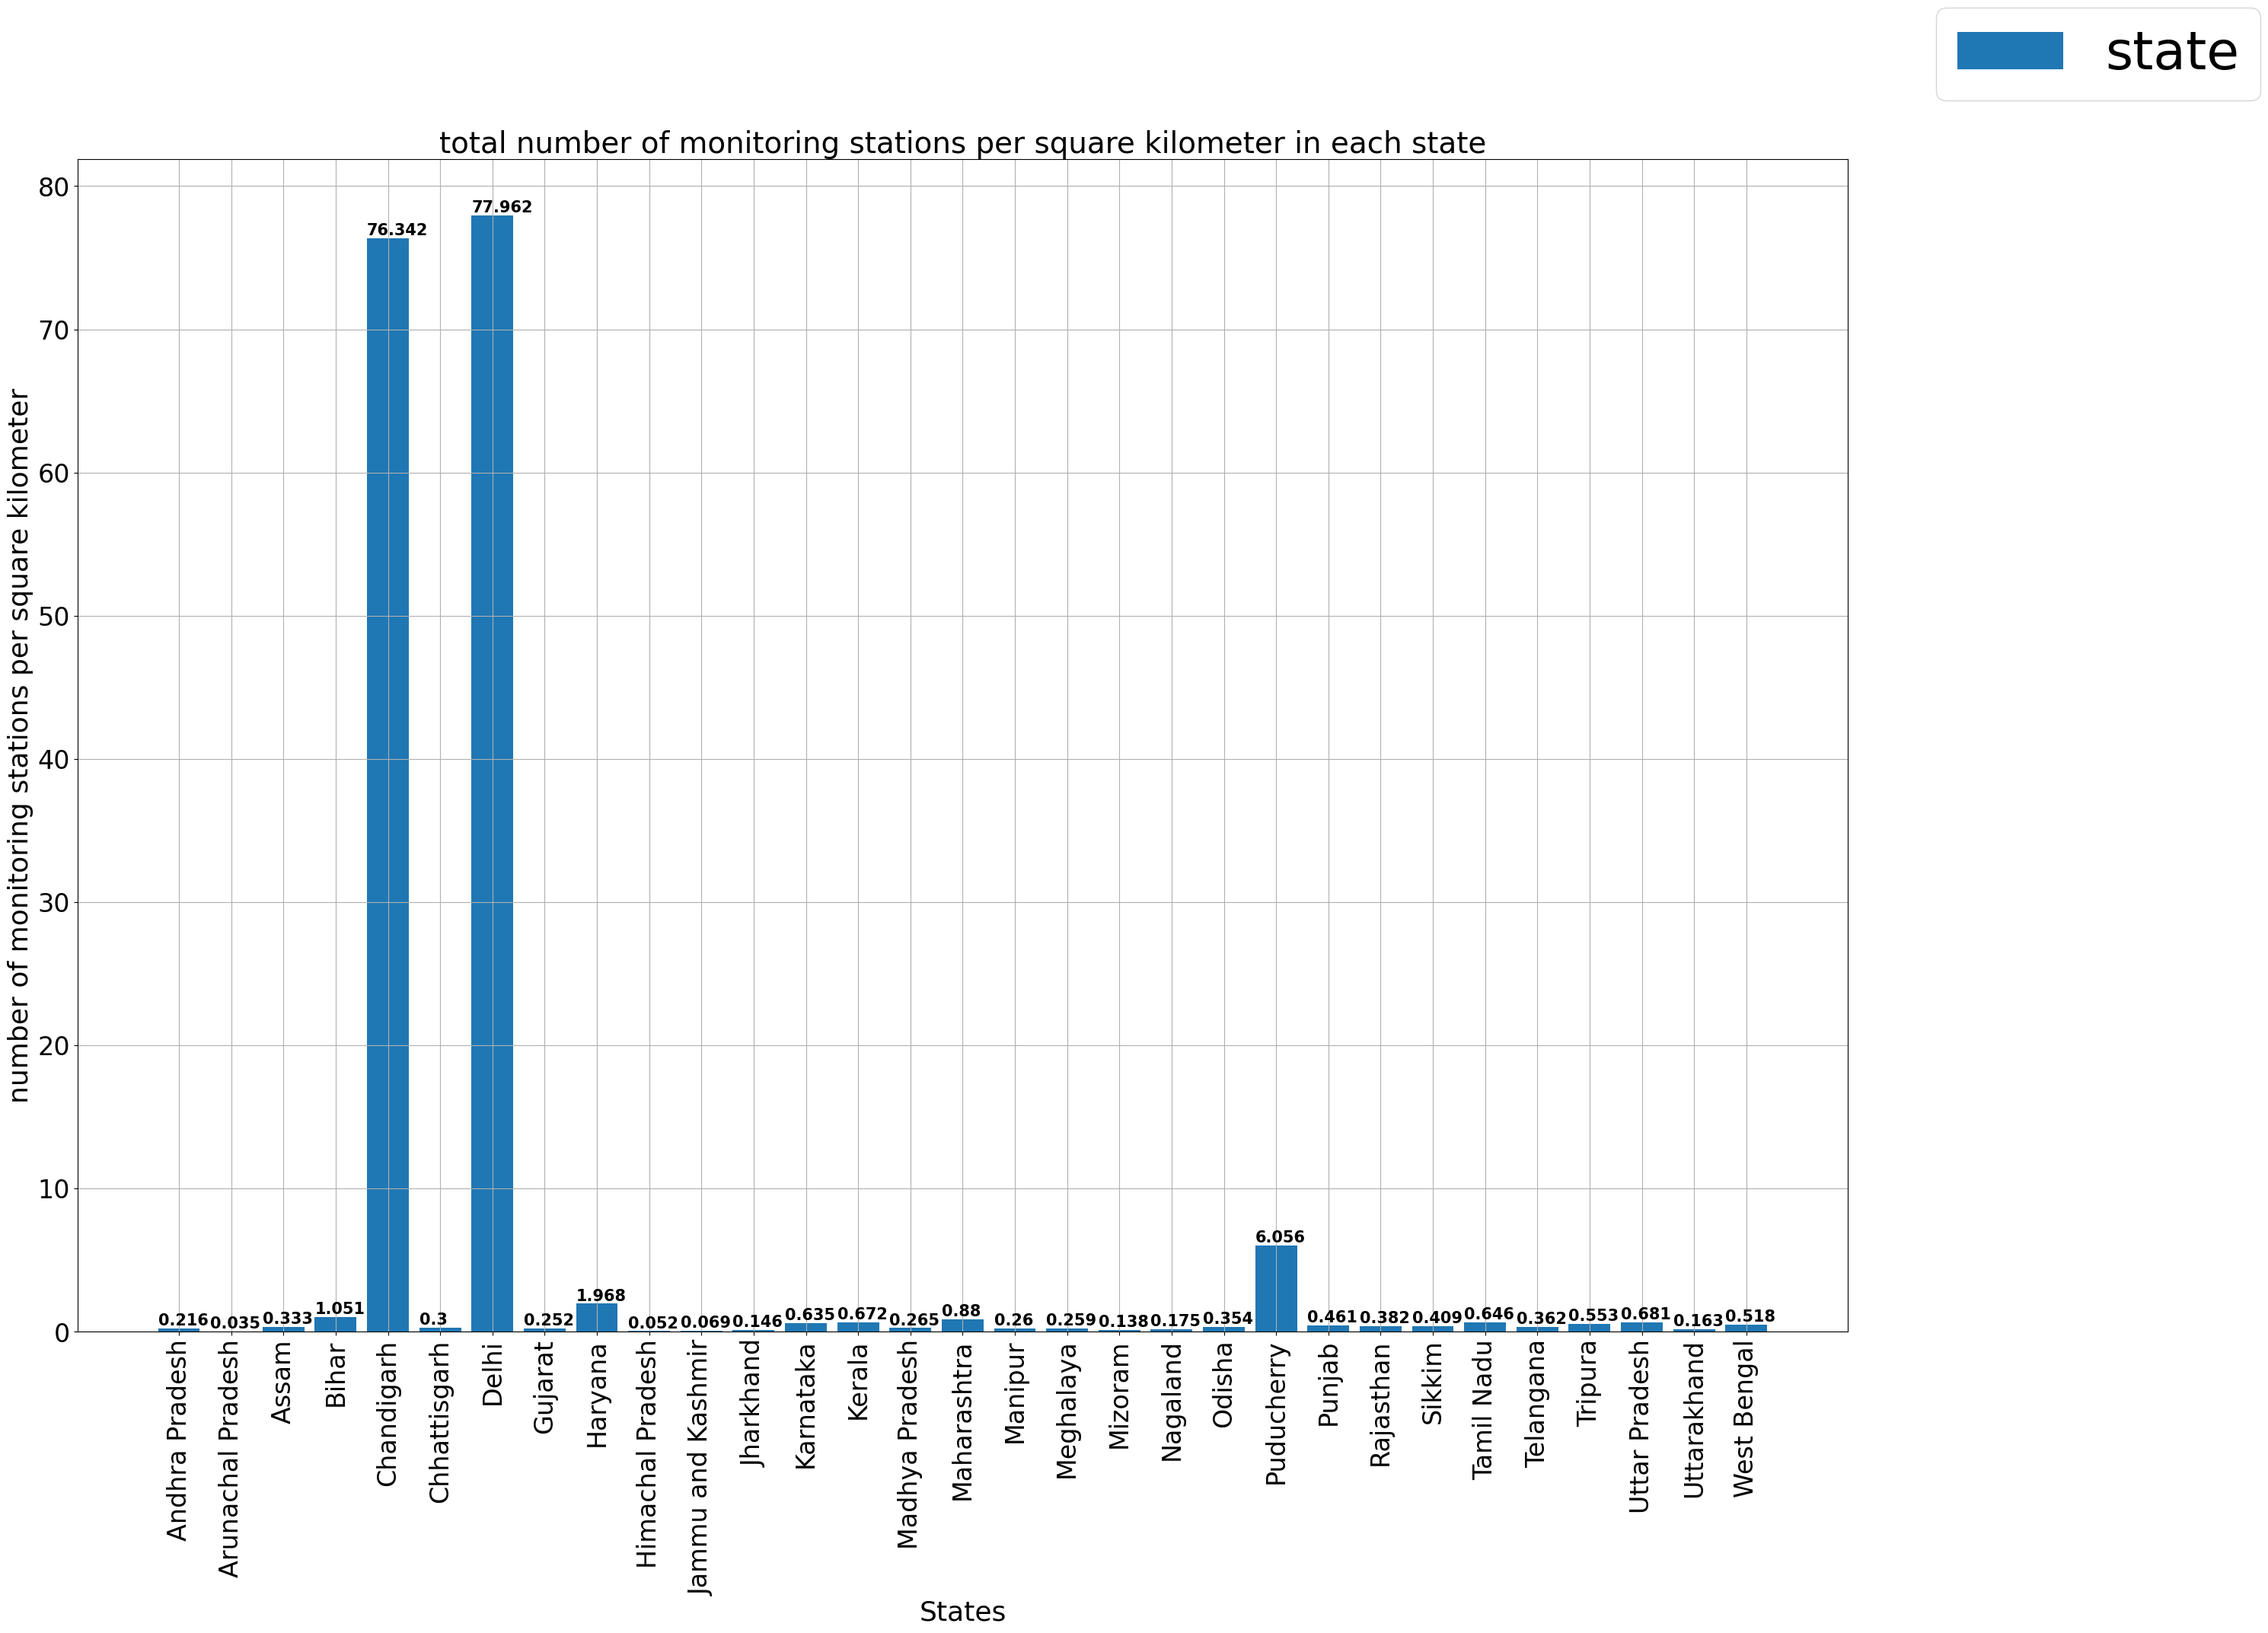

In [ ]:
df11=df1.copy()
df33=df3.copy()
df11["Timestamp"]=pd.to_datetime(df11["Timestamp"], errors="coerce")
df33.rename(columns={"State":"state"},inplace=True)
grp1=df11.groupby("state")["station"].count()
grp2=df33.groupby("state")["Area (km2)"].sum()
grp=(grp1/grp2).reset_index()
grp.rename(columns={0:"per"},inplace=True)
grp.sort_values(by="per",ascending=False)
print(grp.head(1)["state"].to_list())
plt.figure(figsize=(30,20))
bars=plt.bar(grp["state"],grp["per"], color="C0",label="state")
plt.xlabel("States",fontsize=26)
plt.ylabel("number of monitoring stations per square kilometer",fontsize=26)
plt.title("total number of monitoring stations per square kilometer in each state",fontsize=28)
plt.grid(True)
for bar in bars:
        yval = bar.get_height()  # Get bar height
        plt.text(bar.get_x(),yval, round(yval,3), va='bottom',fontsize=15,fontweight='bold',color='black')
plt.yticks(fontsize=24)
plt.xticks(rotation=90,fontsize=24)
plt.legend(loc=(1.05,1.05),fontsize=50)
plt.show()


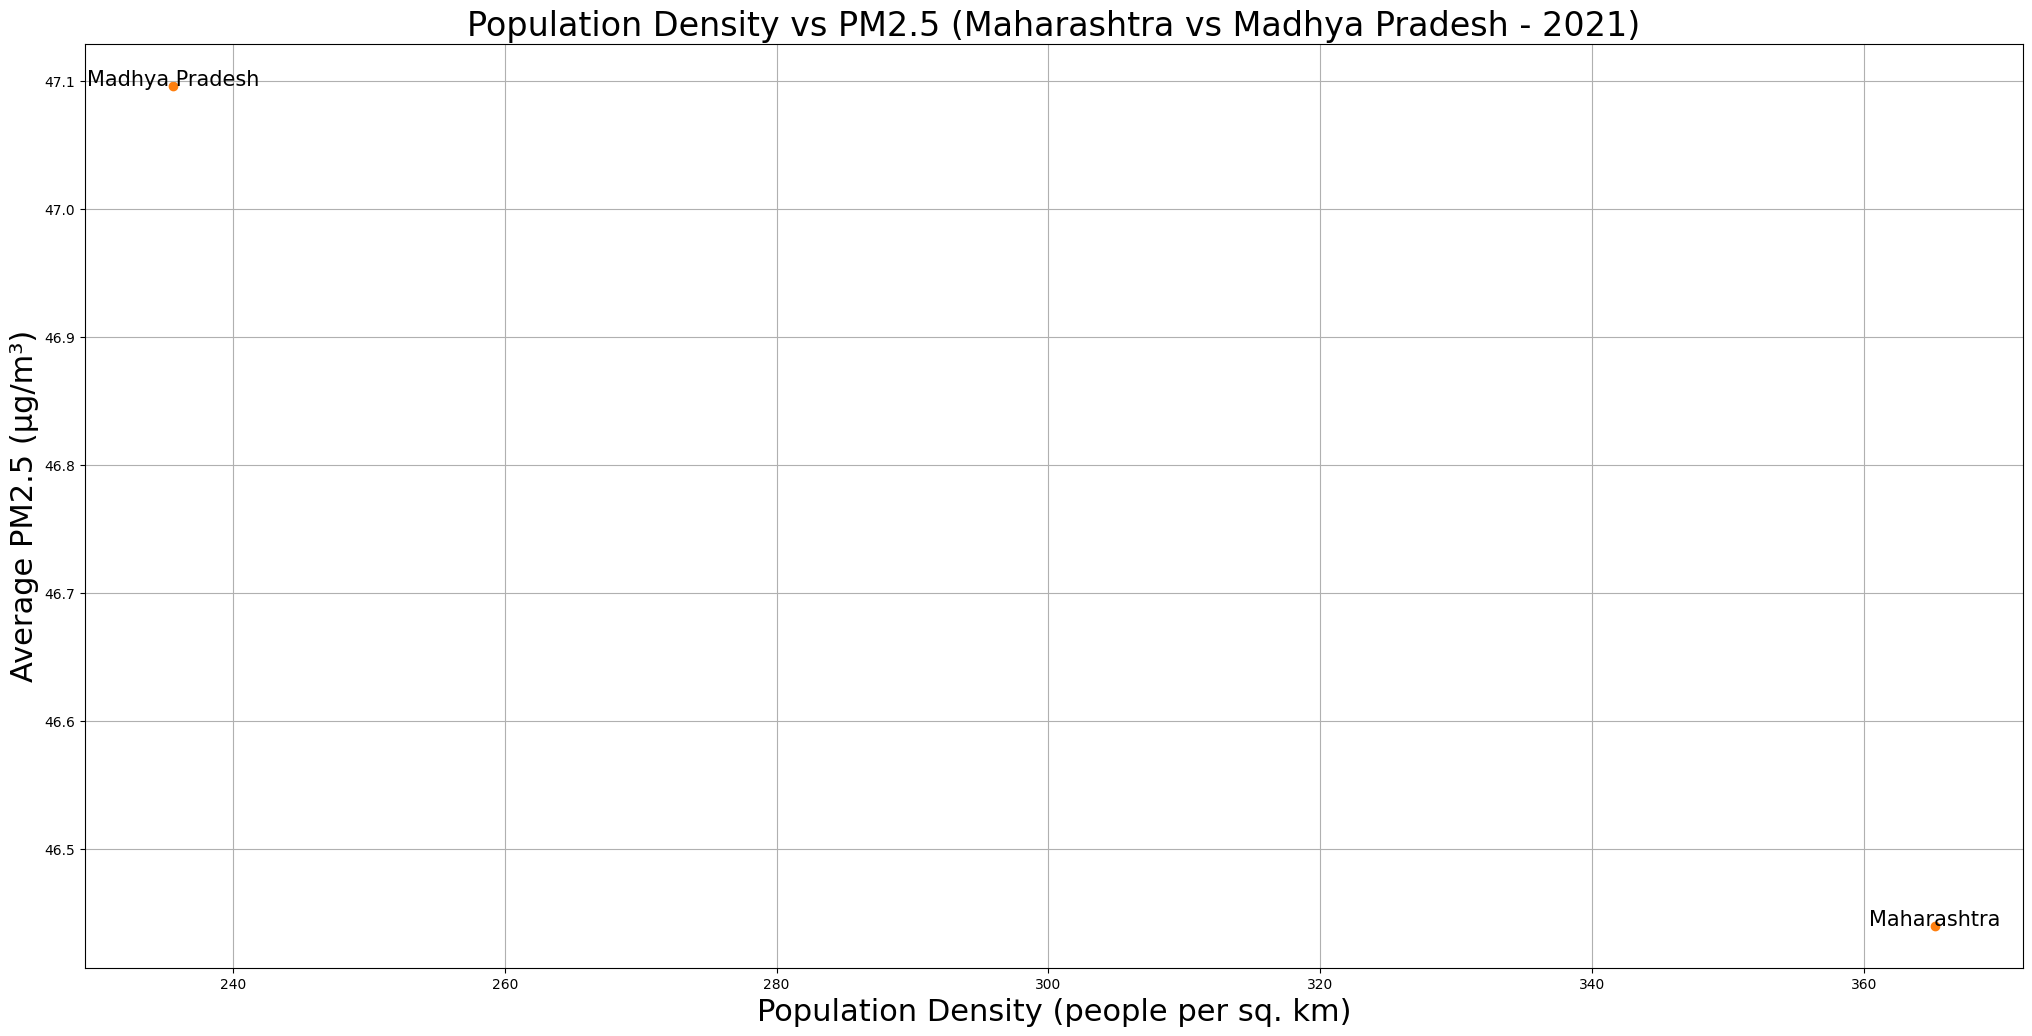

In [ ]:

df11 = df1.copy()
df11["Timestamp"] = pd.to_datetime(df11["Timestamp"], errors="coerce")
df11 = df11[df11["Timestamp"].dt.year == 2021]

df11 = df11[df11["state"].isin(["Maharashtra", "Madhya Pradesh"])]

grp = df11.groupby('state')['PM2.5'].mean().reset_index()
pop_den=pop_den.reset_index()
pop_den = pop_den[pop_den["state"].isin(["Maharashtra", "Madhya Pradesh"])]

df_merged = pd.merge(grp, pop_den, on="state")
df_merged
df_merged
plt.figure(figsize=(25, 12))
plt.scatter(df_merged[0], df_merged["PM2.5"], color="C1")
plt.xlabel("Population Density (people per sq. km)", fontsize=22)
plt.ylabel("Average PM2.5 (µg/m³)", fontsize=22)
plt.title("Population Density vs PM2.5 (Maharashtra vs Madhya Pradesh - 2021)", fontsize=24)

# Add labels on each point
for i, row in df_merged.iterrows():
    plt.text(row[0], row["PM2.5"], row["state"], fontsize=15, ha='center')

plt.grid(True)
plt.show()

# 1. Maharashtra has 1.55 times the population density of Madhya Pradesh, leading to almost equal PM2.5 levels.
# 2. This positive correlation suggests that higher population density (with associated activities like transportation, industry, and construction) directly increases air pollution levels.
# 3. Despite having similar geographic areas, Maharashtra’s more urbanized and industrialized environment results in significantly higher pollution.

**Funding Based [3 Marks]**

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [ ]:

merged_df = pd.merge(df, fund, left_on='state', right_on='State', how='inner')
# Converting 'Amount released during FY 2021-22' to numeric to remove '-' values
merged_df['Amount released during FY 2021-22'] = pd.to_numeric(merged_df['Amount released during FY 2021-22'], errors='coerce')

mask1 = merged_df[merged_df['Amount released during FY 2021-22'].notna()]
mask2 = merged_df[merged_df['Amount released during FY 2021-22'].isna()]

avg_pm25_received = mask1.groupby('State')['PM2.5'].mean()
avg_pm25_no_funding = mask2.groupby('State')['PM2.5'].mean()

print("States that received NCAP funding")
print(avg_pm25_received)
print("States that did not receive NCAP funding")
print(avg_pm25_no_funding)

States that received NCAP funding
State
Andhra Pradesh       35.049347
Bihar                76.918759
Chandigarh           56.666803
Delhi               104.100918
Himachal Pradesh     62.516878
Karnataka            28.894840
Madhya Pradesh       45.874375
Maharashtra          43.491415
Meghalaya            24.513390
Nagaland             33.439550
Odisha               52.109504
Telangana            38.114469
Uttar Pradesh        70.893996
Uttarakhand          36.788767
Name: PM2.5, dtype: float64
States that did not receive NCAP funding
State
Andhra Pradesh    35.049347
Assam             57.962372
Bihar             76.918759
Chhattisgarh      28.761571
Gujarat           52.462657
Jharkhand         54.281545
Karnataka         28.894840
Madhya Pradesh    45.874375
Maharashtra       43.491415
Odisha            52.109504
Punjab            52.243166
Rajasthan         54.230341
Tamil Nadu        31.289620
Telangana         38.114469
Uttar Pradesh     70.893996
Uttarakhand       36.788767
Wes

2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


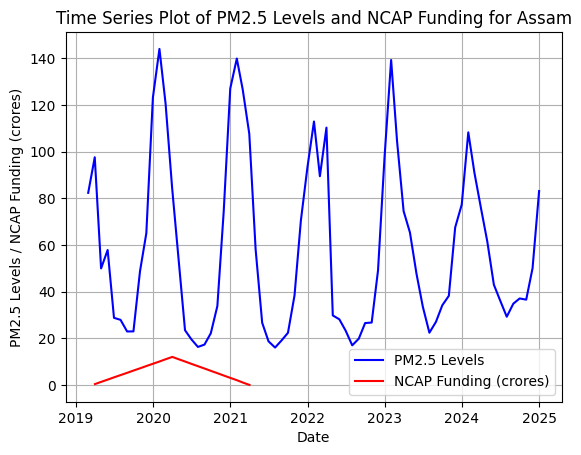

In [ ]:
assam_air_quality = df[df['state'] == 'Assam']
assam_funding = fund[fund['State'] == 'Assam']

pm25_monthly = assam_air_quality.resample('ME', on='Timestamp')['PM2.5'].mean()

# getting sum as 0.120.060.060.060.06 so converting to num
assam_funding.loc[:, 'Amount released during FY 2019-20'] = pd.to_numeric(assam_funding['Amount released during FY 2019-20'], errors='coerce')
assam_funding.loc[:, 'Amount released during FY 2020-21'] = pd.to_numeric(assam_funding['Amount released during FY 2020-21'], errors='coerce')
assam_funding.loc[:, 'Amount released during FY 2021-22'] = pd.to_numeric(assam_funding['Amount released during FY 2021-22'], errors='coerce')
# getting SettingWithCopyWarning warning  thats why using .loc[:,

total_funding_2019_20 = assam_funding['Amount released during FY 2019-20'].sum()
total_funding_2020_21 = assam_funding['Amount released during FY 2020-21'].sum()
total_funding_2021_22 = assam_funding['Amount released during FY 2021-22'].sum()



# Prepare funding DataFrame
funding_years = ['2019-04-01', '2020-04-01', '2021-04-01']
funding_amounts = [total_funding_2019_20, total_funding_2020_21, total_funding_2021_22]
funding_df = pd.DataFrame({'Year': pd.to_datetime(funding_years), 'Funding': funding_amounts})

# Convert to numeric (extra safety)
funding_df['Funding'] = pd.to_numeric(funding_df['Funding'], errors='coerce')

# Resample to monthly with linear interpolation
funding_monthly = funding_df.set_index('Year').resample('MS').interpolate(method='linear')

# Plot PM2.5 data
plt.plot(pm25_monthly.index, pm25_monthly, label='PM2.5 Levels', color='blue')

# Plot funding data
plt.plot(funding_monthly.index, funding_monthly['Funding'], label='NCAP Funding (crores)', color='red')

# Formatting
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels / NCAP Funding (crores)')
plt.title('Time Series Plot of PM2.5 Levels and NCAP Funding for Assam')
plt.legend()
plt.grid(True)
plt.show()

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


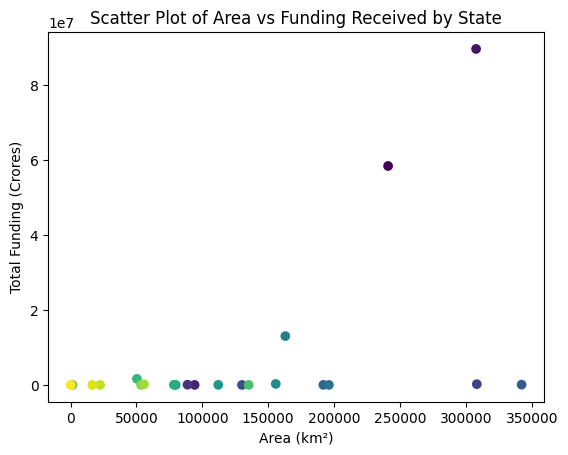

In [14]:
fund['Total fund released'] = fund.groupby('State')['Total fund released'].transform('sum')
funding_state = fund.drop_duplicates(subset=['State'])[['State', 'Total fund released']]
merged_data = pd.merge(s_data, funding_state, on='State')

sc = plt.scatter(merged_data['Area (km2)'], merged_data['Total fund released'], c=pd.factorize(merged_data['State'])[0])

plt.xlabel('Area (km²)')
plt.ylabel('Total Funding (Crores)')
plt.title('Scatter Plot of Area vs Funding Received by State')
plt.show()

**Miscellaneous Questions [5 Marks]**
1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]


In [26]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')
mask = df[df['Timestamp'].dt.year == 2023]
avg_pm25 = mask.groupby('city')['PM2.5'].mean().reset_index()
city = avg_pm25['city'][avg_pm25['PM2.5'].idxmax()]

city_data = mask[mask['city'] == city]
hazardous_days = city_data[city_data['PM2.5'] > 300].shape[0]
total_days = city_data['Timestamp'].nunique()
percentage = (hazardous_days / total_days) * 100

print(f"The most polluted city in 2023 is {city}.")
print(f"The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is {percentage:.2f}%")

The most polluted city in 2023 is Darbhanga.
The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is 0.82%


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]


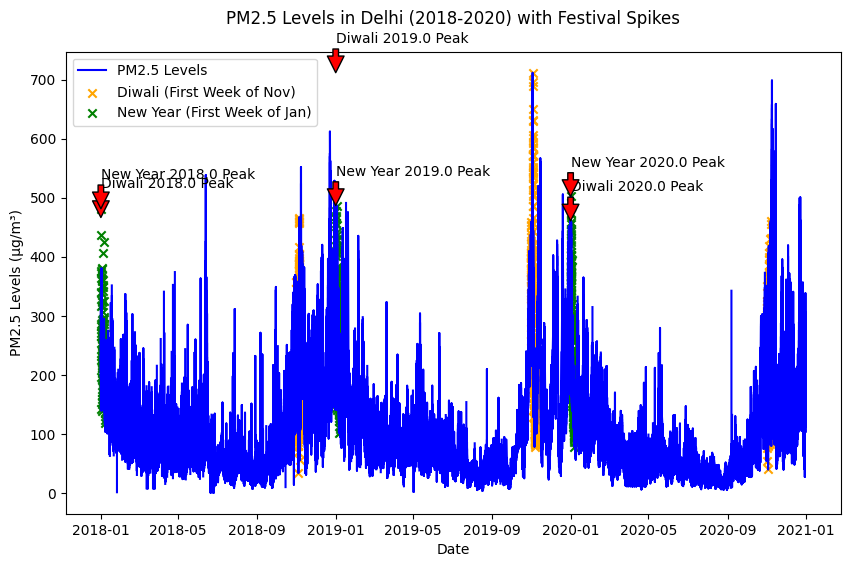

In [45]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')
delhi_data = df[df['city'] == 'Delhi']


diwali = delhi_data[(delhi_data['Timestamp'].dt.month == 11) & (delhi_data['Timestamp'].dt.day <= 7)]
new_year = delhi_data[(delhi_data['Timestamp'].dt.month == 1) & (delhi_data['Timestamp'].dt.day <= 7)]

delhi_2018_2020 = delhi_data[delhi_data['Timestamp'].dt.year.isin([2018, 2019, 2020])]
diwali_2018_2020 = diwali[diwali['Timestamp'].dt.year.isin([2018, 2019, 2020])]
new_year_2018_2020 = new_year[new_year['Timestamp'].dt.year.isin([2018, 2019, 2020])]


plt.figure(figsize=(10, 6))
plt.plot(delhi_2018_2020['Timestamp'], delhi_2018_2020['PM2.5'], label='PM2.5 Levels', color='blue')


plt.scatter(diwali_2018_2020['Timestamp'], diwali_2018_2020['PM2.5'], color='orange', label='Diwali (First Week of Nov)', marker='x')
plt.scatter(new_year_2018_2020['Timestamp'], new_year_2018_2020['PM2.5'], color='green', label='New Year (First Week of Jan)', marker='x')

# Marking sigificant peeks
peak_diwali = diwali_2018_2020.groupby(diwali_2018_2020['Timestamp'].dt.year)['PM2.5'].max()
peak_new_year = new_year_2018_2020.groupby(new_year_2018_2020['Timestamp'].dt.year)['PM2.5'].max()

peak_diwali = peak_diwali.reset_index()
peak_new_year = peak_new_year.reset_index()

# Annotate spikes
for index, row in peak_diwali.iterrows():
    plt.annotate(f'Diwali {row["Timestamp"]} Peak', xy=(delhi_2018_2020[delhi_2018_2020['Timestamp'].dt.year == row['Timestamp']].iloc[0]['Timestamp'], row['PM2.5']),
                 xytext=(delhi_2018_2020[delhi_2018_2020['Timestamp'].dt.year == row['Timestamp']].iloc[0]['Timestamp'], row['PM2.5'] + 50),
                 arrowprops=dict(facecolor='red', shrink=0.05))

for index, row in peak_new_year.iterrows():
    plt.annotate(f'New Year {row["Timestamp"]} Peak', xy=(delhi_2018_2020[delhi_2018_2020['Timestamp'].dt.year == row['Timestamp']].iloc[0]['Timestamp'], row['PM2.5']),
                 xytext=(delhi_2018_2020[delhi_2018_2020['Timestamp'].dt.year == row['Timestamp']].iloc[0]['Timestamp'], row['PM2.5'] + 50),
                 arrowprops=dict(facecolor='red', shrink=0.05))


plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
#  pad=20 not to overlape with one of spike text
plt.title('PM2.5 Levels in Delhi (2018-2020) with Festival Spikes', pad=20)
plt.legend()
plt.show()


4. Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

Index(['Timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')


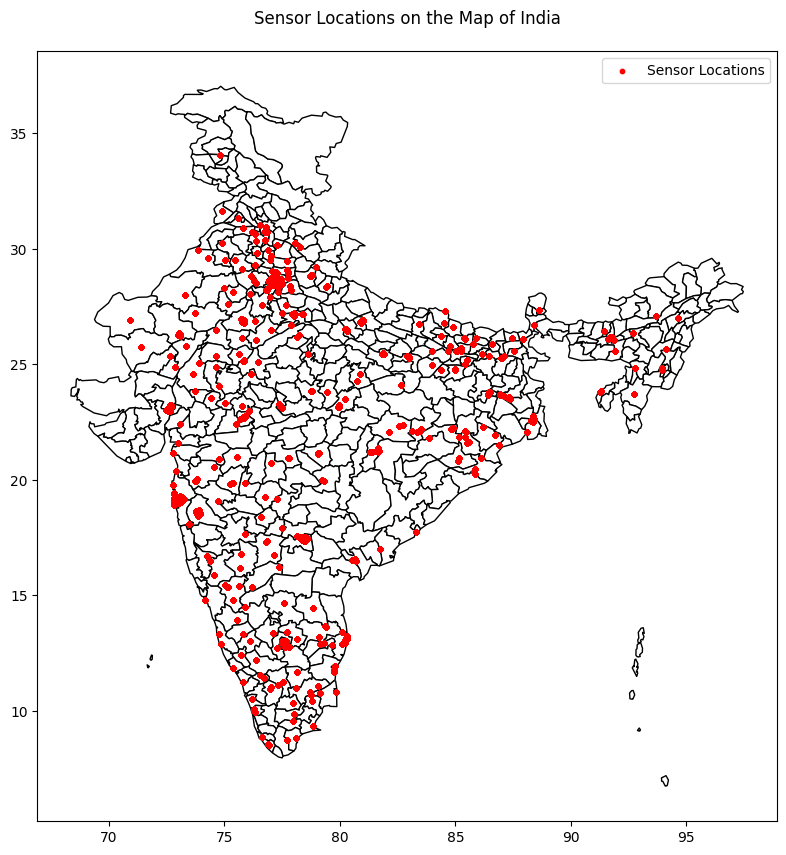

In [55]:
import geopandas as gpd

# Filter data to get the latitude and longitude of the sensors
sensor_locations = df[['latitude', 'longitude']].dropna()

# Load the shapefile for the map of India
india_shapefile = gpd.read_file('india_ds.shp')

# Create a GeoDataFrame for the sensor locations
geometry = gpd.points_from_xy(sensor_locations['longitude'], sensor_locations['latitude'])
sensor_gdf = gpd.GeoDataFrame(sensor_locations, geometry=geometry)

# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 10))
india_shapefile.plot(ax=ax, color='white', edgecolor='black')
sensor_gdf.plot(ax=ax, markersize=10, color='red', marker='o', label='Sensor Locations')
plt.title('Sensor Locations on the Map of India', pad=20)
plt.legend()
plt.show()

**Tell us something new [1 Mark]**
1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.


In [ ]:
#An interesting insight from the dataset is that over 55% of the PM2.5 data is missing overall,
# with 2017 having the highest missing data percentage at 92%.
# This raises concerns about data reliability and completeness, which could impact long-term pollution trend analysis and policy decisions.
#Policymakers should focus on improving data collection and sensor coverage for more accurate assessments. ​